# Proyek Analisis Data: Nama dataset
- Kelompok : Numpy
- Anggota : </br>
10122001 - Revi Farturahman</br>
10122006 - Fadil Hardiyansyah</br>
10122013 - Hilmy Abdurrahman </br>
10122021 - Tijar Taufik Rahman </br>
10122506 - Arya Ababil

## Menentukan Pertanyaan Bisnis

- Berapa Jumlah Pembayaran berdasarkan Jenis Pembayaran dan Jumlah Order berdasarkan Jenis Pembayaran - 10122001 - Revi Faturahman
- Tren Penggunaan Metode Pembayaran (Januari 2017 - Januari 2018) - 10122006-Fadil Hardiyansyah.
- Berapa Jumlah pesanan yang sudah diselesaikan setiap bulan (delivered) dari total pesanan pertahun? - 10122013 - Hilmy Abdurrahman Darmawan
- Dimana Saja Sebaran Pelanggan Berdasarkan Negara dan Sebaran Wilayah Kota Pelanggan Di Negara Brazil - 10122021 - Tijar Taufik Rahman
- Berapa Jumlah Pengiriman Pesanan Setiap Bulan dan Jumlah Pengiriman Pesanan rata-ratanya(bulan) - 10122506 - Arya Ababil


## Menyaipkan semua library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

## Data Wrangling

### Gathering Data

#### * order payments dataset

In [4]:
data_payment = pd.read_csv('order_payments_dataset.csv')
data_payment.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### * geolocation dataset

In [5]:
data_geolocation = pd.read_csv('geolocation_dataset.csv')
data_geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### * orders dataset

In [6]:
data_orders = pd.read_csv('orders_dataset.csv')
data_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Assessing Data

### * order payments dataset

In [7]:
data_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
#  Cek Tipe Data
data_payment.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [9]:
data_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
print(f'Jumlah duplikasi data: {data_payment.duplicated().sum()}')

Jumlah duplikasi data: 0


In [11]:
data_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### * geolocation dataset

In [12]:
data_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
#  Cek Tipe Data
data_geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [14]:
data_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [15]:
print(f'Jumlah duplikasi data: {data_geolocation.duplicated().sum()}')

Jumlah duplikasi data: 261831


In [16]:
data_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### * orders dataset

In [17]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
#  Cek Tipe Data
data_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [19]:
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
print(f'Jumlah duplikasi data: {data_orders.duplicated().sum()}')

Jumlah duplikasi data: 0


In [21]:
data_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


# Cleaning Data

## * Order Payments Dataset

### Cleaning value

In [22]:
# # Konversi Tipe Data kolom-kolom 

# type str column
str_payment = ['order_id','payment_type']
for i in str_payment:
    data_payment[i] = data_payment[i] .astype('string')

print(data_payment.dtypes)
print()
print(data_payment.info())

order_id                string[python]
payment_sequential               int64
payment_type            string[python]
payment_installments             int64
payment_value                  float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  string 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  string 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), string(2)
memory usage: 4.0 MB
None


### Duplicate

In [23]:
data_payment.duplicated()
print("Jumlah duplikasi: ", data_payment.duplicated().sum())

Jumlah duplikasi:  0


###  Missing Values

In [24]:
data_payment.isnull().values.any()

False

In [25]:
data_payment.isnull().any()

order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

In [26]:
data_payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## * Geolocation Dataset

### Cleaning value

In [27]:
# Konversi Tipe Data kolom-kolom 

# type str column
str_geolocation = ['geolocation_city','geolocation_state']
for i in str_geolocation:
    data_geolocation[i] = data_geolocation[i] .astype('string')

print(data_geolocation.dtypes)
print()
print(data_geolocation.info())

geolocation_zip_code_prefix             int64
geolocation_lat                       float64
geolocation_lng                       float64
geolocation_city               string[python]
geolocation_state              string[python]
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  string 
 4   geolocation_state            1000163 non-null  string 
dtypes: float64(2), int64(1), string(2)
memory usage: 38.2 MB
None


### Duplicate

In [28]:
print(f'Jumlah duplikasi data: {data_geolocation.duplicated().sum()}')

Jumlah duplikasi data: 261831


In [29]:
#Menampilkan semua baris data yang sama
data_geolocation[data_geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [30]:
# Menghapus Data Duplikat
data_geolocation.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", data_payment.duplicated().sum())

Jumlah duplikasi:  0


In [31]:
#Mereset Indeks
data_geolocation.reset_index(drop=True, inplace=True)
data_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Missing Value 

In [32]:
data_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

## * Order Data Set

### Cleaning value

In [33]:
# Konversi Tipe Data kolom-kolom 

# type str column
datetime_order = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_purchase_timestamp','order_estimated_delivery_date']
for i in datetime_order:
    data_orders[i] = pd.to_datetime(data_orders[i])

# type str column
str_order = ['order_id','customer_id','order_status']
for i in str_order:
    data_orders[i] = data_orders[i] .astype('string')




print(data_orders.dtypes)
print()
print(data_orders.info())

order_id                         string[python]
customer_id                      string[python]
order_status                     string[python]
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  string        
 1   customer_id                    99441 non-null  string        
 2   order_status                   99441 non-null  string        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_car

### Duplicate

In [34]:
data_orders.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", data_orders.duplicated().sum())

Jumlah duplikasi:  0


### Missing Values

In [35]:
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [36]:
# Menghitung rata-rata dari setiap kolom dan mengisi nilai null dengan rata-rata
mean_approved_at = data_orders['order_approved_at'].mean()
data_orders['order_approved_at'].fillna(mean_approved_at, inplace=True)

mean_carrier_date = data_orders['order_delivered_carrier_date'].mean()
data_orders['order_delivered_carrier_date'].fillna(mean_carrier_date, inplace=True)

mean_customer_date = data_orders['order_delivered_customer_date'].mean()
data_orders['order_delivered_customer_date'].fillna(mean_customer_date, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3848\4293187770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_orders['order_approved_at'].fillna(mean_approved_at, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3848\4293187770.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [37]:
#  Cek data null
data_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [38]:
# Ekstrak tahun dan bulan dari waktu pembelian
data_orders['purchase_year_month'] = data_orders['order_purchase_timestamp'].dt.to_period('M')

# Filter pesanan yang sudah diselesaikan
completed_orders = data_orders[data_orders['order_status'].isin(['delivered', 'shipped', 'canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved'])]

# Hitung jumlah pesanan per bulan
total_orders_per_month = data_orders.groupby('purchase_year_month').size()

# Hitung jumlah pesanan yang sudah diselesaikan per bulan
completed_orders_per_month = completed_orders.groupby('purchase_year_month').size()

# Hitung persentase pesanan yang sudah diselesaikan per bulan
percentage_completed_orders_per_month = (completed_orders_per_month / total_orders_per_month) * 100

# Tampilkan hasil
print("\nJumlah Pesanan yang Sudah Diselesaikan per Bulan:")
print(completed_orders_per_month)



Jumlah Pesanan yang Sudah Diselesaikan per Bulan:
purchase_year_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

#### * Order Payments Dataset

In [39]:
# Menghitung total pembayaran untuk setiap jenis pembayaran
payment_type_distribution = data_payment.groupby('payment_type')['payment_value'].sum()
payment_type_distribution

payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
not_defined           0.00
voucher          379436.87
Name: payment_value, dtype: float64

In [40]:
# Menghitung total Baris untuk setiap jenis pembayaran
payment_type_distribution = data_payment.groupby('payment_type')['payment_value'].count()
payment_type_distribution

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: payment_value, dtype: int64

In [41]:
# Menghitung total order untuk setiap jenis pembayaran
payment_type_order = data_payment.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
payment_type_order

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

#### * Explore Geolocation Dataset

In [42]:
data_geolocation.groupby(by="geolocation_state").geolocation_city.nunique().sort_values(ascending=False)

geolocation_state
MG    1426
SP    1048
RS     691
BA     652
PR     651
SC     420
GO     384
MA     299
PI     278
PE     267
CE     260
PB     254
RJ     245
PA     219
RN     214
MT     213
TO     173
ES     160
MS     133
AL     130
SE      96
RO      83
AM      74
AC      34
DF      28
AP      17
RR      14
Name: geolocation_city, dtype: int64

In [43]:
data_geolocation.groupby(by="geolocation_state").geolocation_city.nunique().sort_values(ascending=False)

geolocation_state
MG    1426
SP    1048
RS     691
BA     652
PR     651
SC     420
GO     384
MA     299
PI     278
PE     267
CE     260
PB     254
RJ     245
PA     219
RN     214
MT     213
TO     173
ES     160
MS     133
AL     130
SE      96
RO      83
AM      74
AC      34
DF      28
AP      17
RR      14
Name: geolocation_city, dtype: int64

In [44]:
#Data Berdasarkan Negara Brazil atau DF 
sp_data = data_geolocation.loc[data_geolocation['geolocation_state'] == 'DF']

# Menghilangkan Dulfikat Data Yang Sama pada kolom geolocation_city dan geolocation_state
sp_data = sp_data.drop_duplicates(subset='geolocation_city')
data_geo_state = data_geolocation.drop_duplicates(subset='geolocation_state')


In [45]:
# Cek Jumlah Baris Berdasarkan Negara yang berbeda
display(data_geo_state)
display(f'Jumlah Data Kota di Brazil : {len(data_geo_state)} Baris')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
11127,2116,-23.515978,-46.582170,são paulo,RN
45154,4011,-23.578707,-46.645779,sao paulo,AC
285978,20010,-22.902472,-43.174059,rio de janeiro,RJ
364816,29010,-20.319586,-40.329319,vitória,ES
377448,30001,-19.923989,-43.935706,belo horizonte,MG
478801,40080,-12.987172,-38.522682,salvador,BA
506521,49010,-10.910515,-37.052401,aracaju,SE
509174,50060,-8.061695,-34.882393,recife,PE
522337,57060,-9.590207,-35.766997,maceio,AL


'Jumlah Data Kota di Brazil : 27 Baris'

In [46]:
# Cek Jumlah Kota Dinegara Brazil
display(sp_data)
display(f'Jumlah Data Negara : {len(sp_data)} Baris')
display()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
566840,70057,-15.790439,-47.880655,brasilia,DF
566842,70072,-15.801476,-47.882896,brasília,DF
567805,70673,-15.795504,-47.921436,cruzeiro,DF
569211,71065,-15.843681,-47.972077,guara,DF
569343,71015,-15.822031,-47.988112,guará,DF
569731,71571,-15.774453,-47.776639,paranoa,DF
569740,71505,-15.729730,-47.861180,lago norte,DF
570109,71675,-15.822333,-47.802116,lago sul,DF
570177,71692,-15.901496,-47.774546,sao sebastiao,DF
570185,71693,-15.908013,-47.758046,são sebastião,DF


'Jumlah Data Negara : 28 Baris'

#### * Explore Order DataSet

In [47]:
# Menghitung waktu pengiriman ('delivery_time') hari
data_orders['waktu_pengiriman'] = (data_orders['order_delivered_customer_date'] - data_orders['order_purchase_timestamp']).dt.days

data_orders[[ 'order_purchase_timestamp','order_delivered_customer_date','waktu_pengiriman']].head()

,order_purchase_timestamp,order_delivered_customer_date,waktu_pengiriman
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,2018-02-13 21:18:39,2018-02-16 18:17:02,2


In [48]:
# Menambahkan kolom bulan
data_orders['bulan_pesanan'] = data_orders['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pesanan tiap bulan
jumlah_pesanan_bulanan = data_orders.groupby('bulan_pesanan')['customer_id'].count()

# Membuat DataFrame baru untuk hasil jumlah pesanan
hasil_pesanan_bulanan = pd.DataFrame(jumlah_pesanan_bulanan).reset_index()
hasil_pesanan_bulanan

,bulan_pesanan,customer_id
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [49]:
# Menghitung waktu pengiriman rata-rata setiap bulan
waktu_pengiriman_bulanan = data_orders.groupby('bulan_pesanan')['waktu_pengiriman'].mean()

# Ubah hasil ke dalam DataFrame untuk kemudahan pembacaan
hasil_rata_rata_bulanan = pd.DataFrame(waktu_pengiriman_bulanan).reset_index().rename(columns={'bulan_pesanan': 'bulan', 'waktu_pengiriman': 'rata-rata pengiriman'})
hasil_rata_rata_bulanan


,bulan,rata-rata pengiriman
0,2016-09,383.250000
1,2016-10,93.216049
2,2016-12,4.000000
3,2017-01,33.528750
4,2017-02,35.563483
5,2017-03,27.263609
6,2017-04,25.169717
7,2017-05,20.465135
8,2017-06,18.304777
9,2017-07,17.686538


In [50]:
# Ekstrak tahun dan bulan dari waktu pembelian
data_orders['purchase_year_month'] = data_orders['order_purchase_timestamp'].dt.to_period('M')

# Filter pesanan yang sudah diselesaikan
completed_orders = data_orders[data_orders['order_status'].isin(['delivered', 'shipped', 'canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved'])]

# Hitung jumlah pesanan per bulan
total_orders_per_month = data_orders.groupby('purchase_year_month').size()

# Hitung jumlah pesanan yang sudah diselesaikan per bulan
completed_orders_per_month = completed_orders.groupby('purchase_year_month').size()

# Hitung persentase pesanan yang sudah diselesaikan per bulan
percentage_completed_orders_per_month = (completed_orders_per_month / total_orders_per_month) * 100

# Tampilkan hasil
print("\nJumlah Pesanan yang Sudah Diselesaikan per Bulan:")
print(completed_orders_per_month)



Jumlah Pesanan yang Sudah Diselesaikan per Bulan:
purchase_year_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


#### * Explore Order DataSet dan Order Payments Dataset

In [51]:
# Menggabungkan data order dan payment
merged_data = pd.merge(data_orders, data_payment, on='order_id')
merged_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year_month,waktu_pengiriman,bulan_pesanan,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8,2017-10,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8,2017-10,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8,2017-10,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,13,2018-07,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9,2018-08,1,credit_card,3,179.12


In [52]:
# Memfilter data hanya untuk rentang waktu Januari 2017 hingga Januari 2018
filtered_data = merged_data.loc[(merged_data['order_purchase_timestamp'] >= '2017-01-01') & (merged_data['order_purchase_timestamp'] < '2018-02-01')].copy()

# Ekstrak tahun dan bulan dari waktu pembelian
filtered_data['purchase_year_month'] = filtered_data['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pembayaran untuk setiap metode per bulan
payment_trend = filtered_data.groupby(['purchase_year_month', 'payment_type']).size().unstack()


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Berapa Jumlah Pembayaran berdasarkan Jenis Pembayaran dan Jumlah Order berdasarkan Jenis Pembayaran - 10122001 - Revi Faturahman

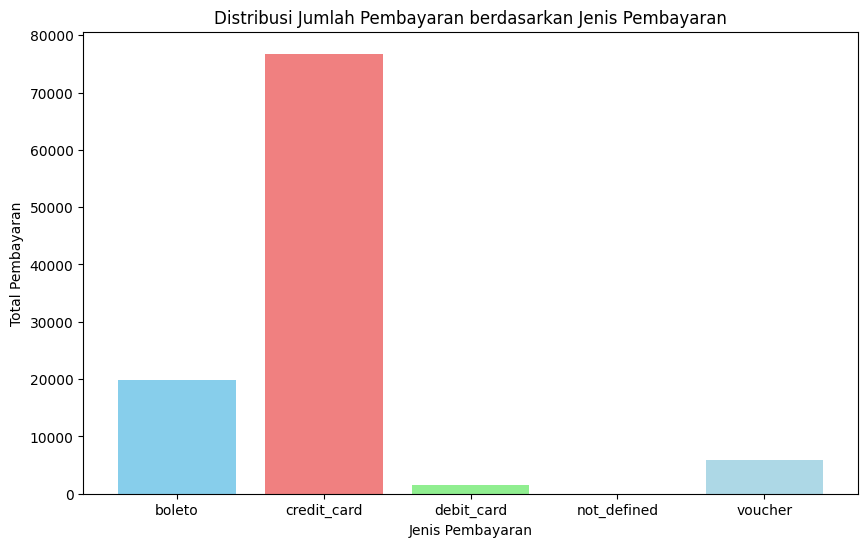

In [53]:
# Membuat daftar warna untuk setiap kategori pembayaran
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue']

# Visualisasi menggunakan diagram batang dengan warna yang berbeda untuk setiap kategori
plt.figure(figsize=(10, 6))
plt.bar(payment_type_distribution.index,
        payment_type_distribution,
        color=colors)
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Total Pembayaran')
plt.title('Distribusi Jumlah Pembayaran berdasarkan Jenis Pembayaran')
plt.show()



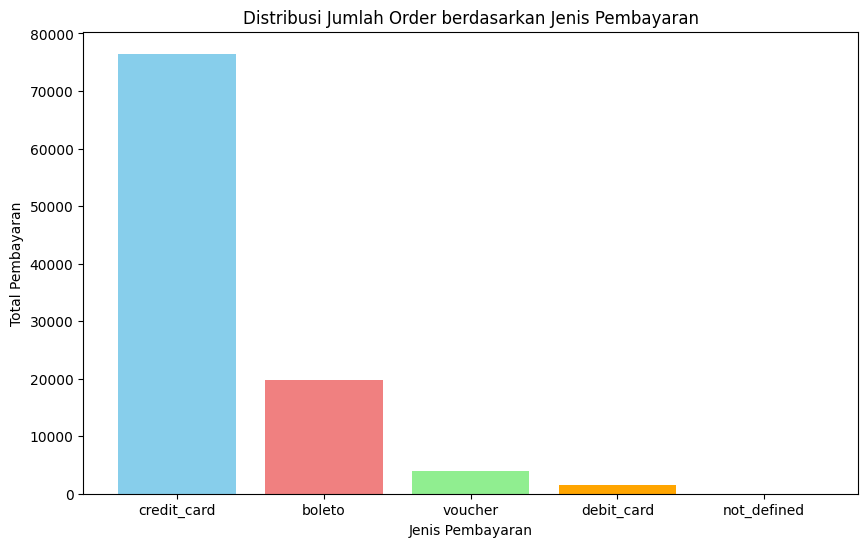

In [54]:
# Visualisasi menggunakan diagram batang dengan warna yang berbeda untuk setiap kategori
plt.figure(figsize=(10, 6))
plt.bar(payment_type_order.index,
        payment_type_order,
        color=colors)
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Total Pembayaran')
plt.title('Distribusi Jumlah Order berdasarkan Jenis Pembayaran')
plt.show()

### Pertanyaan 2: 

Tren Penggunaan Metode Pembayaran (Januari 2017 - Januari 2018) - 10122006-Fadil Hardiyansyah.

<Figure size 1200x600 with 0 Axes>

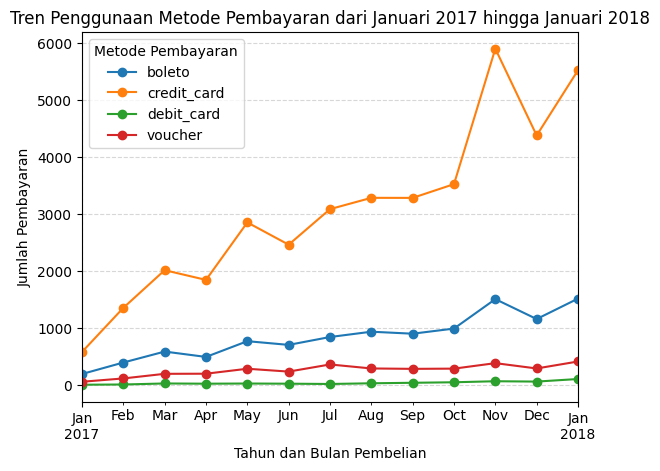

In [55]:
# Set tema seaborn
# sns.set_theme()

# Visualisasi tren penggunaan metode pembayaran
plt.figure(figsize=(12, 6))
payment_trend.plot(marker='o')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Tren Penggunaan Metode Pembayaran dari Januari 2017 hingga Januari 2018')
plt.xlabel('Tahun dan Bulan Pembelian')
plt.ylabel('Jumlah Pembayaran')
plt.legend(title='Metode Pembayaran', loc='upper left')
plt.show()


### Pertanyaan 3:

Berapa Jumlah dan persentase pesanan yang sudah diselesaikan (delivered) dari total pesanan? - 10122013 - Hilmy Abdurrahman Darmawan

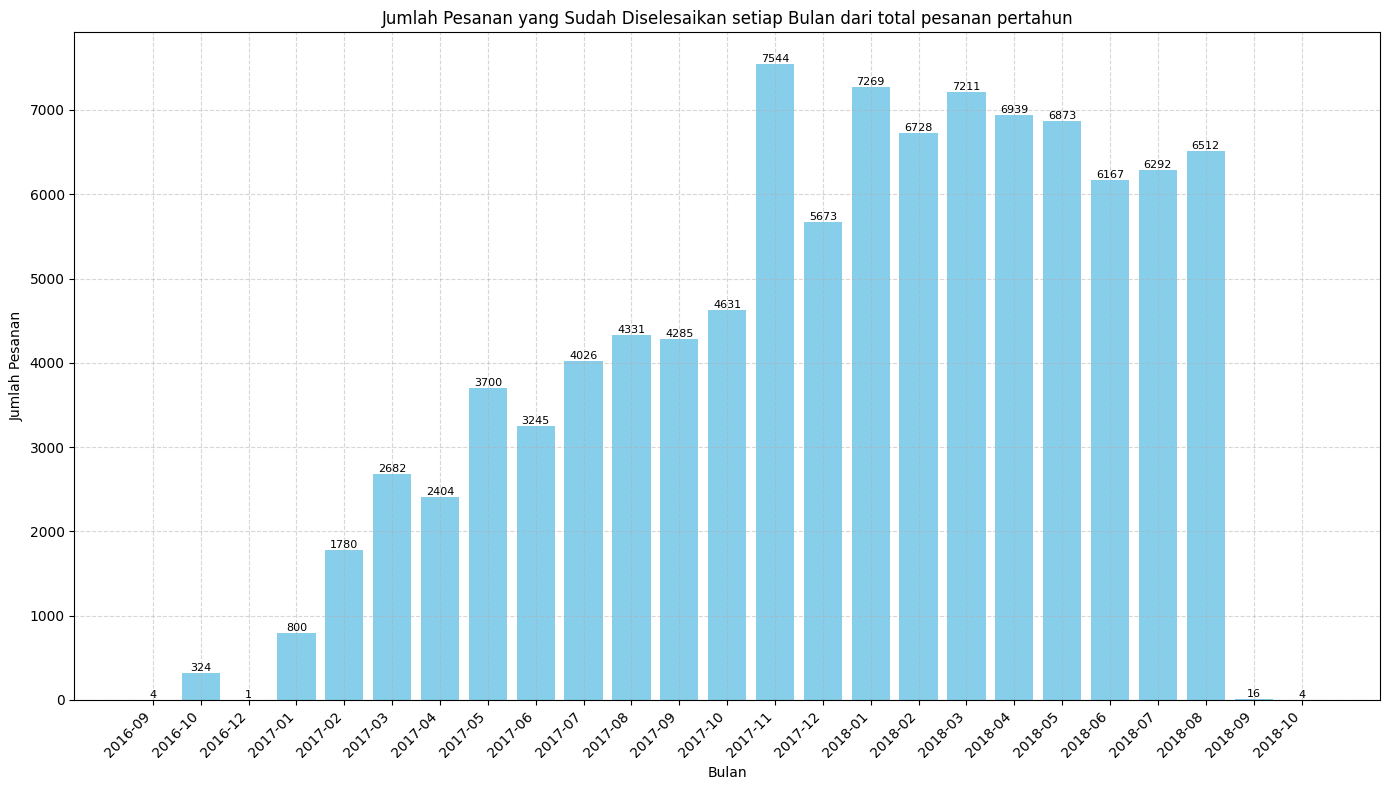

In [56]:
# Data
months = completed_orders_per_month.index.astype(str)
completed_orders_values = completed_orders_per_month.values

# Plot diagram batang dengan label dan warna yang diperbarui
plt.figure(figsize=(14, 8))
bars = plt.bar(months, completed_orders_values, color='skyblue')

# Menambahkan label pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom', fontsize=8, color='black')

plt.title('Jumlah Pesanan yang Sudah Diselesaikan setiap Bulan dari total pesanan pertahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')  # Untuk memutar label bulan agar lebih mudah dibaca
plt.tight_layout()  # Untuk menghindari pemotongan label
plt.show()


### Pertanyaan 4: 

Dimana Saja Sebaran Pelanggan Berdasarkan Negara dan Sebaran Wilayah Kota Pelanggan Di Negara Brazil - 10122021 - Tijar Taufik Rahman

In [57]:
peta = folium.Map(location=[-10.04,-55.28], zoom_start=5) 

# Tambahkan penanda untuk setiap baris data
for index, row in data_geo_state.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f"{row['geolocation_city']}, {row['geolocation_state']}",
        icon=folium.Icon(color='blue'),
        tooltip=f"City: {row['geolocation_city']}, State: {row['geolocation_state']}"
    ).add_to(peta)

# Tampilkan / Output
print()
print(f'Sebaran Pelanggan Berdasarkan Negara ')
peta



Sebaran Pelanggan Berdasarkan Negara 


In [58]:
peta2 = folium.Map(location=[-15.8139,-47.9560], zoom_start=11)

for index, row in sp_data.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f"{row['geolocation_city']}, {row['geolocation_state']}",
        icon=folium.Icon(color='red'),
        tooltip=f"City: {row['geolocation_city']}, State: {row['geolocation_state']}"
    ).add_to(peta2)
# Tampilkan / Output
print()

print('Sebaran Kota - Kota Pelanggan Di Negara Brazi')
peta2


Sebaran Kota - Kota Pelanggan Di Negara Brazi


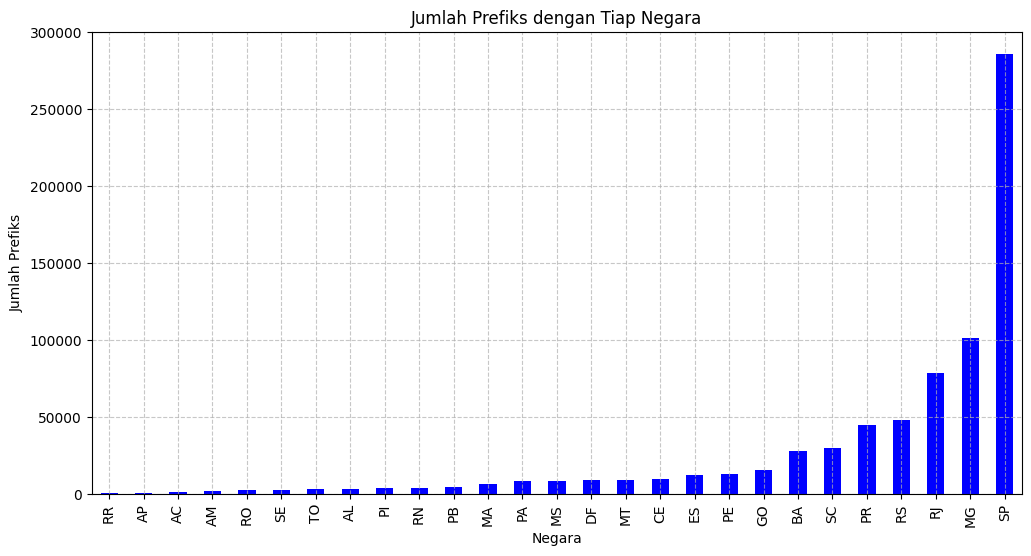

In [64]:
prefix_count = data_geolocation.groupby('geolocation_state')['geolocation_zip_code_prefix'].count()

# Membuat plot Bar Chart dengan grid garis
fig, ax = plt.subplots(figsize=(12, 6))
prefix_count.sort_values().plot(kind='bar', color='blue', ax=ax)
ax.set_xlabel('Negara')
ax.set_ylabel('Jumlah Prefiks')
ax.set_title('Jumlah Prefiks dengan Tiap Negara')

# Menambahkan grid garis
ax.grid(True, linestyle='--', alpha=0.7)

# Menampilkan plot menggunakan Streamlit
plt.show()

### Pertanyaan 5: 

Berapa Jumlah Pengiriman Pesanan Setiap Bulan dan Jumlah Pengiriman Pesanan rata-ratanya(bulan) - 10122506 - Arya Ababil

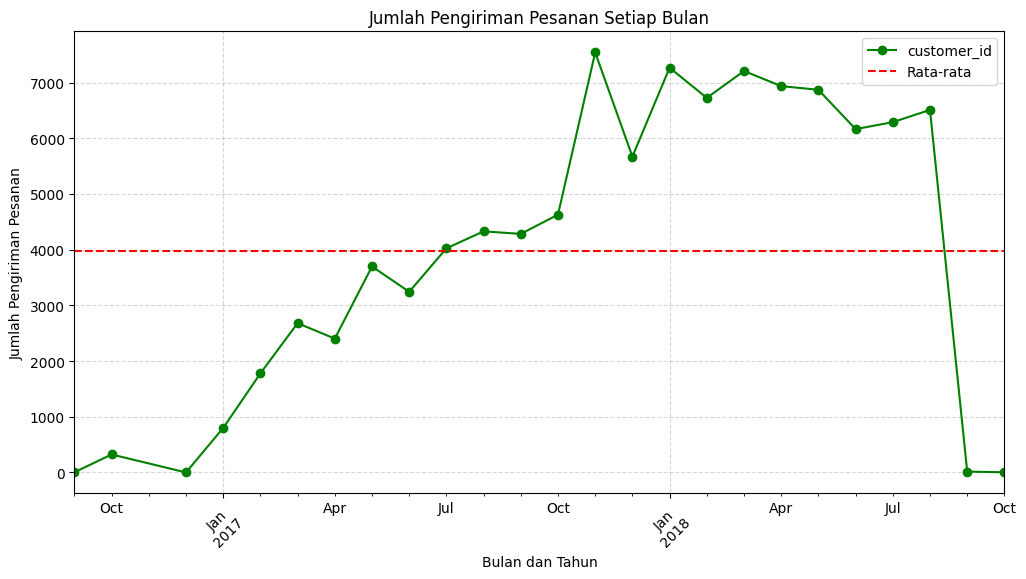

In [68]:
plt.figure(figsize=(12, 6))
jumlah_pesanan_bulanan.plot(kind='line',marker='o',color='green')
jumlah_pesanan_bulanan_garis = jumlah_pesanan_bulanan.mean()
plt.axhline(y=jumlah_pesanan_bulanan_garis, color='red', linestyle='--', label='Rata-rata')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title('Jumlah Pengiriman Pesanan Setiap Bulan')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Pengiriman Pesanan')
plt.xticks(rotation=45 )
plt.show()


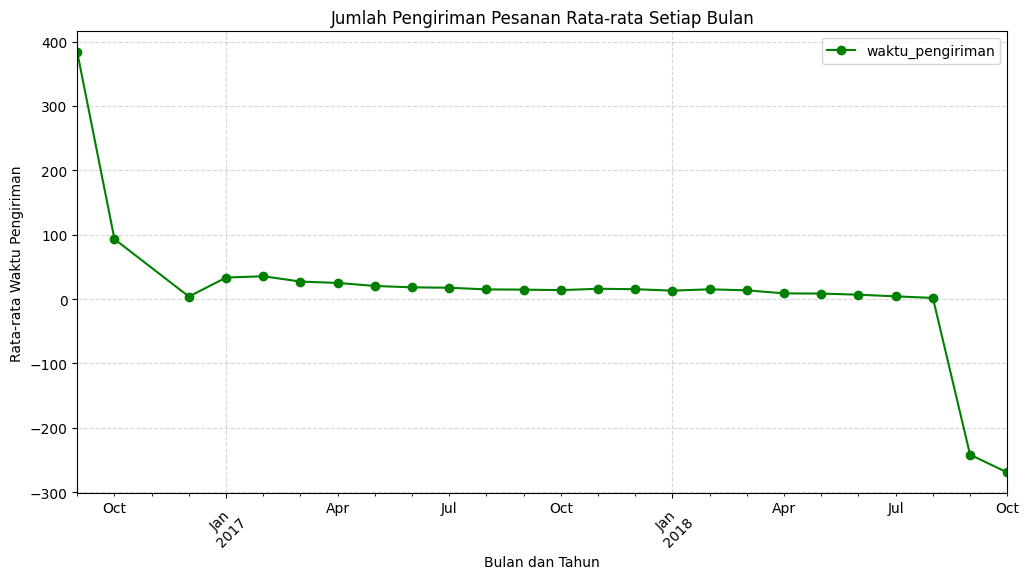

In [62]:
plt.figure(figsize=(12, 6))
waktu_pengiriman_bulanan.plot(kind='line',marker='o',color='green')
# # Hitung rata-rata
hasil_rata_rata_bulanan_min = waktu_pengiriman_bulanan.mean()

# Garis rata-rata
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.title('Jumlah Pengiriman Pesanan Rata-rata Setiap Bulan')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Rata-rata Waktu Pengiriman')
plt.xticks(rotation=45 )
plt.show()


## Conclusion

### - Conclution pertanyaan 1

- Kesimpulan
    - adalah bahwa kita ingin mengetahui total pembayaran berdasarkan jenis pembayaran dan jumlah order berdasarkan jenis pembayaran.
    - Dengan kata lain, kita ingin melihat hubungan antara jumlah pembayaran dan jumlah order dengan memperhatikan jenis pembayaran yang digunakan.

### - Conclution pertanyaan 2

- kesimpulannya <br>
    - Metode Pembayaran Favorit:<br>
    Kelihatan banget kalau ada satu atau beberapa cara pembayaran yang paling sering dipake. Mungkin lebih banyak yang suka bayar pake kartu kredit atau transfer bank.<br>
    - Stabil atau Nggak Sih:<br>
Ternyata cara pembayaran yang dipilih orang cukup stabil dari bulan ke bulan. Artinya, mereka punya pilihan tetap buat bayar belanjaa<br>
    - Ada Yang Berubah Gak Ya:<br> 
Ternyata ada perubahan signifikan di beberapa bulan. Bisa jadi karena musim belanja atau ada event tertentu yang ngaruh ke pilihan pembayara<br>
    - Saran Buat Bisnis:<br> 
Dari data ini, kayaknya ada peluang buat bisnis nih. Misalnya, kalo ada cara pembayaran yang lagi naik daun, mungkin bisa dipromosikan lebih keras lag<br>
    - Jangan Abaiin Waktu:<br>
Analisis bulanan itu berguna banget buat lihat bagaimana perilaku pembayaran bisa berubah seiring berjalannya wakt<br>
    - Perlu Pembenahan:<br>
Kalo ada cara pembayaran yang kurang populer, mungkin bisnis perlu ngecek lagi strategi atau proses pembayarannya. Apakah ada yang bisa diperbaik<br>
    - Lihat Juga Aspek Waktu Spesifik:<br>
Tampaknya ada hubungan antara pilihan pembayaran dan waktu tertentu, seperti musim atau event khusus. Bisnis bisa siap-siap adaptasi strategi buat momen-momen i.
      
Jadi, kesimpulannya, analisis ini bantu banget buat ngelihat gimana orang membayar belanjaan mereka dari waktu ke waktu. Ini bisa jadi dasar buat bisnis buat ngambil keputusan dan nyetel strategi supaya lebih nyaman buat pelanggan dan efisien buat operasional.  i?u.i.n.n.
    

### - Conclution pertanyaan 3

- Berdasarkan analisis jumlah pesanan yang sudah diselesaikan per bulan, kita dapat membuat beberapa kesimpulan :
  
   - Tren Pertumbuhan : <br>
        Terdapat tren pertumbuhan yang signifikan dalam jumlah pesanan yang sudah diselesaikan dari tahun 2016 hingga pertengahan 2018.
   - Puncak Tertinggi : <br>
        Puncak tertinggi terjadi pada bulan November 2017, di mana jumlah pesanan yang sudah diselesaikan mencapai 7544.
   - Variabilitas Bulanan : <br>
        Ada variasi jumlah pesanan yang sudah diselesaikan setiap bulan, namun secara umum terjadi peningkatan dari waktu ke waktu.
   - Pengaruh Tahun Baru dan Akhir Tahun : <br>
        Terdapat penurunan yang signifikan pada bulan Desember 2016 dan Desember 2017, yang mungkin terkait dengan liburan tahun baru.

### - Conclution pertanyaan 4

- kesimpulan dari pertanyaan 4  adalah :    - Data ini Menampilkan Distribusi Pelanggan Berdasarkan Negara secara lebih efektif, memungkinkan kita untuk merinci negara-negara yang telah tercakup oleh pelanggan. Hal ini dapat membantu mengidentifikasi peluang bisnis potensial serta pola wilayah yang masih belum dieksplorasi, memudahkan strategi pengembangan lebih lanjut.
      
    - dan Menampilkan Pemetaan Pelanggan Berdasarkan wilayah Kota di Negara Brazil Dengan harapan mempermudah pengidentifikasian peluang bisnis atau pola           wilayah yang belum terjamah

### - Conclution pertanyaan 5

- Kesimpulan 
    -  Dari Jumlah Pengirmanan pesanan di atas, beberapa kesimpulan yang dapat diambil adalah :
      
       - Data Ini Menampilkan data statistik yang mencakup jumlah keseluruhan pengiriman pesanan yang tercatat setiap bulan
       - dan Menampilkan Juga Jumlah Pengiriman Pesanan Rata-rata Setiap Bulan